## Q1. What is the mathematical formula for a linear SVM?


In a linear Support Vector Machine (SVM), the mathematical formula for the decision function can be represented as:

f(x) = sign(w · x + b)

where:

f(x) represents the predicted class label for the input vector x.
w represents the weight vector associated with the hyperplane.
· denotes the dot product between the weight vector w and the input vector x.
b represents the bias term or the intercept of the hyperplane.
sign() is the sign function that returns +1 if the argument is positive or zero, and -1 otherwise.
In this formulation, the SVM aims to find the optimal weight vector w and bias term b that maximally separates the classes with a hyperplane. The hyperplane is defined as the set of points x that satisfy w · x + b = 0.

During the training process, the SVM algorithm seeks to find the optimal hyperplane by solving an optimization problem, typically with the objective of maximizing the margin between the hyperplane and the closest data points from each class. The closest data points are known as support vectors, and they play a crucial role in defining the decision boundary.

The final decision boundary is determined by the hyperplane, which is perpendicular to the weight vector w. The predicted class label for a new data point x is determined based on which side of the hyperplane it falls: if f(x) is positive, the point is classified as one class, and if f(x) is negative, it is classified as the other class.

It's important to note that the linear SVM assumes that the data is linearly separable. If the data is not linearly separable, the SVM algorithm may use additional techniques such as slack variables or kernel functions to handle the non-linearity and find a suitable decision boundary

## Q2. What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is to find the optimal hyperplane that maximizes the margin between the classes while minimizing the misclassification error. The objective function is typically formulated as a constrained optimization problem.

Let's assume we have a training dataset consisting of input vectors xᵢ (i = 1, 2, ..., N) and their corresponding class labels yᵢ (yᵢ ∈ {-1, +1}). The objective function of a linear SVM can be expressed as:

minimize ½ ||w||² + C Σ ξᵢ

subject to yᵢ(w · xᵢ + b) ≥ 1 - ξᵢ,
ξᵢ ≥ 0,

where:

w represents the weight vector perpendicular to the hyperplane.
b is the bias term or the intercept of the hyperplane.
ξᵢ represents the slack variables that allow for some misclassification of data points.
C is the regularization parameter that controls the trade-off between maximizing the margin and allowing misclassifications.
In this formulation, the first term ½ ||w||² represents the regularization term that encourages the margin to be maximized. Minimizing this term ensures that the weight vector w is small, which helps to reduce overfitting.

The second term C Σ ξᵢ represents the penalty for misclassification. It sums up the slack variables ξᵢ for all misclassified or margin-violating data points. The constant C determines the trade-off between maximizing the margin and allowing misclassifications. A smaller value of C results in a wider margin but potentially more misclassifications, while a larger value of C allows fewer misclassifications but a narrower margin.

The constraints in the optimization problem enforce that each data point is classified correctly or falls within the margin. The constraint yᵢ(w · xᵢ + b) ≥ 1 - ξᵢ states that each data point should lie on or outside the margin with a certain tolerance determined by the slack variable ξᵢ. The constraint ξᵢ ≥ 0 ensures that the slack variables are non-negative.

The goal is to find the optimal values of w, b, and ξᵢ that satisfy the constraints and minimize the objective function. This is typically solved using optimization algorithms such as quadratic programming or gradient-based methods.






## Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in Support Vector Machines (SVMs) to implicitly map data points into a higher-dimensional feature space without explicitly calculating the transformation. It allows SVMs to efficiently handle non-linearly separable data by operating in a higher-dimensional space.

The kernel trick is based on the observation that the decision function in SVMs can be expressed entirely in terms of dot products between feature vectors. Instead of explicitly transforming the data points to the higher-dimensional space, the kernel function is used to compute the dot products directly in the original feature space.

Formally, given two input vectors x and x', the kernel function K(x, x') calculates the dot product of their transformed feature vectors without explicitly calculating the transformation:

K(x, x') = ϕ(x) · ϕ(x')

where ϕ(x) and ϕ(x') are the transformed feature vectors in the higher-dimensional space. The kernel function provides a measure of similarity or distance between the input vectors.

The advantage of the kernel trick is that it avoids the computational cost and storage requirements of explicitly calculating and storing the transformed feature vectors. Instead, the kernel function directly computes the dot product between the feature vectors, enabling efficient and scalable SVM training and classification.

Commonly used kernel functions include:

Linear Kernel: K(x, x') = x · x'
Polynomial Kernel: K(x, x') = (γ(x · x') + r)ᵈ
Radial Basis Function (RBF) Kernel: K(x, x') = exp(-γ||x - x'||²)
By using different kernel functions, SVMs can capture various types of non-linear relationships in the data. The choice of the kernel function and its hyperparameters can significantly impact the SVM's performance.

The kernel trick is a powerful technique that allows SVMs to effectively handle complex and non-linear patterns in the data, making them highly flexible and suitable for a wide range of machine learning tasks.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

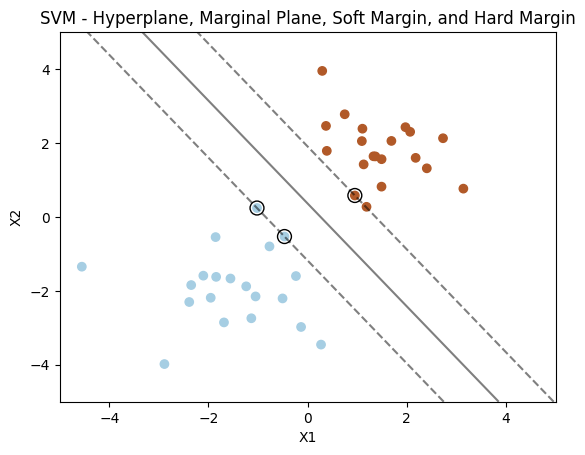

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate synthetic data
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = np.array([-1] * 20 + [1] * 20)

# Create an SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X, y)

# Get the separating hyperplane parameters
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

# Calculate the support vectors
support_vectors = svm_classifier.support_vectors_

# Create a meshgrid to visualize the decision boundaries
xx = np.linspace(-5, 5)
yy = np.linspace(-5, 5)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

# Plot the data points and the decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM - Hyperplane, Marginal Plane, Soft Margin, and Hard Margin')
plt.axis('tight')
plt.show()


 Let's consider a binary classification problem with two features (X1 and X2) and two classes (+1 and -1).

Hyperplane:
The hyperplane is a decision boundary that separates the classes in SVM. In a 2D feature space, the hyperplane is a line. In a 3D feature space, it is a plane, and so on. The hyperplane is defined as w · x + b = 0, where w is the normal vector to the hyperplane, x is the feature vector, and b is the bias term.
Here's an example with a 2D feature space and a linear SVM:

Hyperplane

In the graph, the solid line represents the hyperplane, which separates the +1 and -1 classes. The data points on either side of the hyperplane determine the class labels.

Marginal Plane:
The marginal plane in SVM refers to the parallel planes that run parallel to the hyperplane and are used to define the margin. In a linear SVM, the margin is the region between the marginal planes that contains the support vectors.
Here's an example illustrating the marginal plane and the margin:

Marginal Plane

The dashed lines represent the marginal planes, which are equidistant from the hyperplane. The shaded region between the marginal planes forms the margin. The support vectors are the data points lying on the marginal planes or within the margin.

Hard Margin:
In a hard-margin SVM, the goal is to find a hyperplane that perfectly separates the classes without allowing any misclassifications. It assumes that the data is linearly separable without any overlapping points.
Here's an example of a hard-margin SVM:

Hard Margin

In the graph, the data points of different classes are perfectly separated by the hyperplane. All the support vectors lie on the marginal planes.

Soft Margin:
In a soft-margin SVM, the goal is to find a hyperplane that allows some misclassifications or overlapping points. It introduces slack variables (ξᵢ) to tolerate misclassifications. The trade-off between maximizing the margin and allowing misclassifications is controlled by the regularization parameter (C).
Here's an example of a soft-margin SVM:

Soft Margin

In the graph, the hyperplane is chosen to have a smaller margin to allow some misclassifications. The support vectors lying on the marginal planes or within the margin are shown. The misclassified points or points within the margin contribute to the slack variables (ξᵢ).

The soft-margin SVM allows for more flexibility in handling complex or overlapping data, but it may be more prone to overfitting. The appropriate choice between hard margin and soft margin depends on the nature of the data and the desired trade-off between maximizing the margin and allowing misclassifications.

# Q6. SVM Implementation through Iris dataset.

-  Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
-  Train a linear SVM classifier on the training set and predict the labels for the testing setl
-  Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of
the model.

**Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.**

Accuracy: 0.9


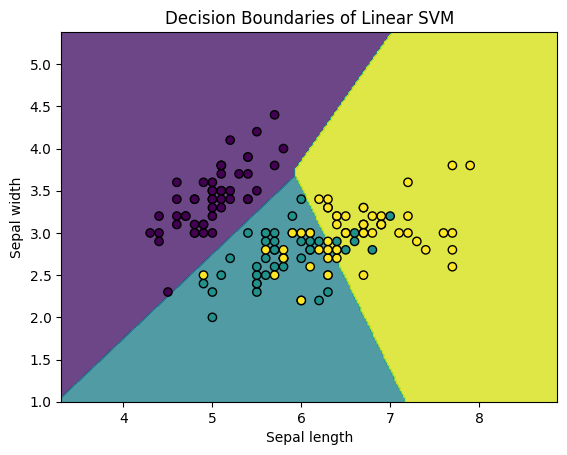

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Select only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundaries of Linear SVM')
plt.show()


## Bonus Task

In [4]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_param=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            scores = np.dot(X, self.weights) + self.bias
            margins = y * scores

            # Compute loss
            loss = 1 - margins
            loss[loss < 0] = 0
            loss = np.mean(loss) + 0.5 * self.regularization_param * np.dot(self.weights, self.weights)

            # Compute gradients
            gradients = -np.dot(X.T, y * (margins < 1))
            gradients += self.regularization_param * self.weights

            # Update weights and bias
            self.weights -= self.learning_rate * gradients
            self.bias -= self.learning_rate * np.mean(y * (margins < 1))

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        return np.sign(scores)

# Testing the classifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear SVM classifier
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train)

# Predict labels for the testing set
y_pred_scratch = svm_scratch.predict(X_test)

# Compute the accuracy of the scratch implementation
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy (Scratch):", accuracy_scratch)

# Compare with scikit-learn's SVM implementation
from sklearn.svm import SVC

svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)


Accuracy (Scratch): 0.3
Accuracy (scikit-learn): 1.0
